Resources: 
- https://www.mdpi.com/2073-4395/13/6/1633
- http://places2.csail.mit.edu/results2016.html
- https://www.researchgate.net/figure/Accuracy-of-ResNet-50-101-and-152-on-ImageNet-and-CIFAR-10-datasets-before-and-after_tbl3_373753811
- https://github.com/DeepLabCut/DeepLabCut/wiki/What-neural-network-should-I-use%3F-(Trade-offs,-speed-performance,-and-considerations)
- https://medium.com/@muhabd51/comparison-and-architecture-of-pre-trained-model-vgg-16-vgg-19-resnet-googlenet-alexnet-0fb459fff368
- https://github.com/jcjohnson/cnn-benchmarks
- https://arxiv.org/abs/1512.03385
- https://medium.com/@enrico.randellini/image-classification-resnet-vs-efficientnet-vs-efficientnet-v2-vs-compact-convolutional-c205838bbf49

## Class classification

In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn as nn
import pandas as pd
import time

def get_class_name(class_number):
    # Assume that the DataFrame 'data' is already defined and contains the data from 'files.csv'
    data = pd.read_csv('/kaggle/input/images256/files.csv')

    # Filter the data to get the rows with the given class number
    filtered_data = data[data['class'] == class_number]
    
    # Extract the name after the first slash from the file_name column
    names = filtered_data['file_name'].apply(lambda x: x.split('/')[1])
    
    # Return the first name in the list
    return names.iloc[0] if len(names) > 0 else None

# Function to load the model for inference
def load_model_for_inference(model_path, num_classes):
    # Automatically detect the device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using {'GPU' if device.type == 'cuda' else 'CPU'} for inference")

    # Initialize the model with ResNet50
    model = models.resnet50(pretrained=False)
    # Update the last fully connected layer to match the number of classes
    
    model.fc = nn.Linear(model.fc.in_features, num_classes)
#     model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
#     model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    
    # Load the saved state dictionary
    state_dict = torch.load(model_path, map_location=device)
    
    # Check if the model was saved with a DataParallel wrapper
    if 'module.' in list(state_dict.keys())[0]:  # If the first key has 'module.', others will too
        # If yes, add a DataParallel wrapper to the model
        model = nn.DataParallel(model)
    
    # Move the model to the specified device
    model = model.to(device)
    
    # Load the state dictionary into the model
    model.load_state_dict(state_dict)
    
    model.eval()
    return model

# Function to preprocess the image
def preprocess_image(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Check if the image is already the right size
        if img.size != (256, 256):
            # If not, resize the image
            img = img.resize((256, 256))
        # Convert the image to RGB
        img = img.convert('RGB')
        # Define the transformation
        transform = transforms.Compose([
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        # Apply the transformation
        img_t = transform(img)
        return img_t.unsqueeze(0)

# Function to predict the class of an image
def predict_image(model, image):
    # Automatically detect the device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    # Move the image to the same device as the model
    image = image.to(device)
    outputs = model(image)
    _, predicted = torch.max(outputs, 1)
    return predicted.item()

# # Function to show the image and the prediction
# def show_prediction(image_path, model_path, num_classes):
#     model = load_model_for_inference(model_path, num_classes)
#     image = preprocess_image(image_path)
#     prediction = predict_image(model, image)
#     plt.imshow(Image.open(image_path))
#     plt.title(f'Predicted class: {get_class_name(prediction)}')
#     plt.show()

# Function to show the image and the prediction with timing
def show_prediction_with_timing(image_path, model_path, num_classes):
    start_time = time.time()  # Start timing
    
    model = load_model_for_inference(model_path, num_classes)
    image = preprocess_image(image_path)
    prediction = predict_image(model, image)
    
    end_time = time.time()  # End timing
    total_time = end_time - start_time  # Calculate total duration
    
    plt.imshow(Image.open(image_path))
    plt.title(f'Predicted class: {get_class_name(prediction)}')
    plt.show()
    
    print(f"Total time taken for prediction: {total_time:.2f} seconds")

# Example
image_path = '/kaggle/input/test-images/Ontario-International-Airport.webp'
model_path = '/kaggle/input/resnet-model/resnet50_best_model (1).pth'
num_classes = 205  


# show_prediction(image_path, model_path, num_classes)
show_prediction_with_timing(image_path, model_path, num_classes)


In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn as nn
import pandas as pd
import time

def get_class_name(class_number):
    # Assume that the DataFrame 'data' is already defined and contains the data from 'files.csv'
    data = pd.read_csv('/kaggle/input/images256/files.csv')

    # Filter the data to get the rows with the given class number
    filtered_data = data[data['class'] == class_number]
    
    # Extract the name after the first slash from the file_name column
    names = filtered_data['file_name'].apply(lambda x: x.split('/')[1])
    
    # Return the first name in the list
    return names.iloc[0] if len(names) > 0 else None

# Function to load the model for inference
def load_model_for_inference(model_path, num_classes):
    # Automatically detect the device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using {'GPU' if device.type == 'cuda' else 'CPU'} for inference")

    # Initialize the model with ResNet50
    model = models.resnet50(pretrained=False)
    # Update the last fully connected layer to match the number of classes
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    
    # Load the saved state dictionary
    state_dict = torch.load(model_path, map_location=device)
    
    # Check if the model was saved with a DataParallel wrapper
    if 'module.' in list(state_dict.keys())[0]:  
        model = nn.DataParallel(model)
    
    # Move the model to the specified device
    model = model.to(device)
    
    # Load the state dictionary into the model
    model.load_state_dict(state_dict)
    
    model.eval()
    return model

# Function to preprocess the image
def preprocess_image(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Check if the image is already the right size
        if img.size != (256, 256):
            # If not, resize the image
            img = img.resize((256, 256))
        # Convert the image to RGB
        img = img.convert('RGB')
        # Define the transformation
        transform = transforms.Compose([
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        # Apply the transformation
        img_t = transform(img)
        return img_t.unsqueeze(0)

# Function to test the prediction speed without loading the image
def test_prediction_speed(model, image, num_tests=100):
    # Automatically detect the device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Move the image to the same device as the model
    image = image.to(device)
    
    # Warm-up run to ensure fair timing
    _ = model(image)
    
    # Start timing
    start_time = time.time()
    
    # Run the prediction 'num_tests' times
    for _ in range(num_tests):
        _ = model(image)
    
    # End timing
    end_time = time.time()
    
    # Calculate total and average duration
    total_time = end_time - start_time
    average_time = total_time / num_tests
    
    print(f"Average prediction time over {num_tests} tests: {average_time:.5f} seconds")

# Example
image_path = '/kaggle/input/test-images/Ontario-International-Airport.webp'
model_path = '/kaggle/input/resnet-model/resnet50_best_model.pth'
num_classes = 205

# Load the model and preprocess the image once
model = load_model_for_inference(model_path, num_classes)
image = preprocess_image(image_path)

# Test the prediction speed
test_prediction_speed(model, image)

In [ ]:
%pip install pretrainedmodels

### all scenes models training

In [ ]:
import os
import random
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset, random_split
from PIL import Image
from torch.cuda.amp import GradScaler, autocast
import multiprocessing
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
import time
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import torch.distributed as dist
from torch.nn.parallel import DistributedDataParallel as DDP

# Seed setting function
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Set a seed for reproducibility
seed = 42
set_seed(seed)

os.makedirs('./models/', exist_ok=True)

# Get the number of available CPU cores
num_cores = multiprocessing.cpu_count()

# Set the device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations for the training dataset with data augmentation
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define transformations for the validation and test datasets without data augmentation
val_test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = Image.open(img_path).convert('RGB')
        label = int(self.annotations.iloc[index, 1])

        if self.transform:
            image = self.transform(image)

        return (image, label)

# Load the dataset
csv_file = '/kaggle/input/images256/files.csv'
root_dir = '/kaggle/input/images256/'
dataset = CustomDataset(csv_file=csv_file, root_dir=root_dir, transform=train_transform)

# Split the dataset into training, validation, and test sets
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(seed))

# Update the transform of the validation and test datasets
val_dataset.dataset.transform = val_test_transform
test_dataset.dataset.transform = val_test_transform

# Create data loaders with multiple workers
def worker_init_fn(worker_id):
    np.random.seed(seed + worker_id)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=num_cores, pin_memory=True, worker_init_fn=worker_init_fn)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=num_cores, pin_memory=True, worker_init_fn=worker_init_fn)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=num_cores, pin_memory=True, worker_init_fn=worker_init_fn)

# Initialize mixed precision scaling
scaler = GradScaler()

# Define a function to create models
def create_model(model_name, num_classes):
    if model_name == 'resnet50':
        model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
    elif model_name == 'resnet18':
        model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
    elif model_name == 'efficientnet':
        model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    elif model_name == 'efficientnet_v2_s':
        model = models.efficientnet_v2_s(weights=models.EfficientNet_V2_S_Weights.IMAGENET1K_V1)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    else:
        raise ValueError("Invalid model name")
    return model

# Define the list of models to be trained
model_names = ['resnet50','resnet18','efficientnet','efficientnet_v2_s']
num_classes = len(set(dataset.annotations['class']))

# Define a function to train and evaluate a model
def train_and_evaluate(model_name, num_epochs=20):
    model = create_model(model_name, num_classes)
    
    # If multiple GPUs are available, wrap model with DataParallel
    if torch.cuda.device_count() > 1:
        print(f"Let's use {torch.cuda.device_count()} GPUs!")
        model = nn.DataParallel(model)

    model = model.to(device)
    
    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    scheduler = ReduceLROnPlateau(optimizer, 'min')

    # Early stopping parameters
    early_stopping_patience = 5
    min_loss = float('inf')
    losses_since_improvement = 0
    best_model_path = f'./models/{model_name}_best_model.pth'
    
    epoch_losses = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        top1_acc = 0.0
        top5_acc = 0.0
        progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f'{model_name} Epoch {epoch+1}/{num_epochs}')
        for batch_idx, (inputs, labels) in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            # Mixed precision training
            with autocast():
                outputs = model(inputs)
                loss = criterion(outputs, labels)
            
            # Scales loss. Calls backward() on scaled loss to create scaled gradients.
            scaler.scale(loss).backward()
            
            # Unscales gradients and calls or skips optimizer.step()
            scaler.step(optimizer)
            
            # Updates the scale for next iteration
            scaler.update()
            
            running_loss += loss.item()
            progress_bar.set_postfix(loss=running_loss/(batch_idx+1))
            
            # Calculate top-1 and top-5 accuracy
            _, pred = outputs.topk(5, 1, True, True)
            pred = pred.t()
            correct = pred.eq(labels.view(1, -1).expand_as(pred))
            top1_correct = correct[:1].view(-1).float().sum(0, keepdim=True)
            top5_correct = correct[:5].reshape(-1).float().sum(0, keepdim=True)
            top1_acc += top1_correct.item()
            top5_acc += top5_correct.item()
        
        epoch_loss = running_loss / len(train_loader)
        epoch_top1_acc = top1_acc / len(train_loader.dataset)
        epoch_top5_acc = top5_acc / len(train_loader.dataset)
        print(f'{model_name} Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Top-1 Accuracy: {epoch_top1_acc}, Top-5 Accuracy: {epoch_top5_acc}')
        
        # Append the epoch loss to our list
        epoch_losses.append(epoch_loss)
        
        # Check for early stopping
        if epoch_loss < min_loss:
            min_loss = epoch_loss
            losses_since_improvement = 0
            # Save the best model
            torch.save(model.state_dict(), best_model_path)
        else:
            losses_since_improvement += 1
            if losses_since_improvement >= early_stopping_patience:
                print(f'Stopping early at epoch {epoch+1}')
                break
        
        # Save the model at every epoch
        torch.save(model.state_dict(), f'./models/{model_name}_model_epoch_{epoch}.pth')
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    top1_acc = 0.0
    top5_acc = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, pred = outputs.topk(5, 1, True, True)
            pred = pred.t()
            correct = pred.eq(labels.view(1, -1).expand_as(pred))
            top1_correct = correct[:1].view(-1).float().sum(0, keepdim=True)
            top5_correct = correct[:5].reshape(-1).float().sum(0, keepdim=True)
            top1_acc += top1_correct.item()
            top5_acc += top5_correct.item()

    val_loss /= len(val_loader)
    val_top1_acc = top1_acc / len(val_loader.dataset)
    val_top5_acc = top5_acc / len(val_loader.dataset)
    print(f'{model_name} Validation Loss: {val_loss}, Top-1 Accuracy: {val_top1_acc}, Top-5 Accuracy: {val_top5_acc}')
    
    return model, val_loss, val_top1_acc, val_top5_acc, epoch_losses

# Function to test a model
def test_model(model, model_name):
    model.eval()
    test_loss = 0.0
    top1_acc = 0.0
    top5_acc = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, pred = outputs.topk(5, 1, True, True)
            pred = pred.t()
            correct = pred.eq(labels.view(1, -1).expand_as(pred))
            top1_correct = correct[:1].view(-1).float().sum(0, keepdim=True)
            top5_correct = correct[:5].reshape(-1).float().sum(0, keepdim=True)
            top1_acc += top1_correct.item()
            top5_acc += top5_correct.item()

    test_loss /= len(test_loader)
    test_top1_acc = top1_acc / len(test_loader.dataset)
    test_top5_acc = top5_acc / len(test_loader.dataset)
    print(f'{model_name} Test Loss: {test_loss}, Top-1 Accuracy: {test_top1_acc}, Top-5 Accuracy: {test_top5_acc}')
    
    return test_loss, test_top1_acc, test_top5_acc

# Train and evaluate each model
model_results = []
for model_name in model_names:
    print(f'Training and evaluating {model_name}')
    start_time = time.time()
    model, val_loss, val_top1_acc, val_top5_acc, epoch_losses = train_and_evaluate(model_name)
    train_time = time.time() - start_time
    test_loss, test_top1_acc, test_top5_acc = test_model(model, model_name)
    inference_time = time.time() - start_time - train_time
    model_results.append((model_name, val_loss, val_top1_acc, val_top5_acc, test_loss, test_top1_acc, test_top5_acc, train_time, inference_time, epoch_losses))

# Compare models
results_df = pd.DataFrame(model_results, columns=['Model', 'Val_Loss', 'Val_Top1_Acc', 'Val_Top5_Acc', 'Test_Loss', 'Test_Top1_Acc', 'Test_Top5_Acc', 'Train_Time', 'Inference_Time', 'Epoch_Losses'])
print(results_df)

# Plot comparison of models
results_df.plot(x='Model', y=['Val_Top1_Acc', 'Test_Top1_Acc'], kind='bar')
plt.title('Model Comparison: Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

results_df.plot(x='Model', y=['Train_Time', 'Inference_Time'], kind='bar')
plt.title('Model Comparison: Training and Inference Time')
plt.ylabel('Time (seconds)')
plt.xlabel('Model')
plt.show()


# Testing

In [ ]:
!lscpu

### VGG16

In [ ]:
import os
import random
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset, random_split
from PIL import Image
from torch.cuda.amp import GradScaler, autocast
import multiprocessing
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Seed setting function
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Set a seed for reproducibility
seed = 42
set_seed(seed)

os.makedirs('./models/', exist_ok=True)

# Get the number of available CPU cores
num_cores = multiprocessing.cpu_count()

# Set the device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations for the training dataset with data augmentation
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define transformations for the validation and test datasets without data augmentation
val_test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = Image.open(img_path).convert('RGB')
        label = int(self.annotations.iloc[index, 1])

        if self.transform:
            image = self.transform(image)

        return (image, label)

# Load the dataset
csv_file = '/kaggle/input/images256/files.csv'
root_dir = '/kaggle/input/images256/'
dataset = CustomDataset(csv_file=csv_file, root_dir=root_dir, transform=train_transform)

# Split the dataset into training, validation, and test sets
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(seed))

# Update the transform of the validation and test datasets
val_dataset.dataset.transform = val_test_transform
test_dataset.dataset.transform = val_test_transform

# Create data loaders with multiple workers
def worker_init_fn(worker_id):
    np.random.seed(seed + worker_id)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=num_cores, pin_memory=True, worker_init_fn=worker_init_fn)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=num_cores, pin_memory=True, worker_init_fn=worker_init_fn)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=num_cores, pin_memory=True, worker_init_fn=worker_init_fn)

# Initialize mixed precision scaling
scaler = GradScaler()

# Define a function to create the VGG-16 model
def create_model(num_classes):
    model = models.vgg16(pretrained=False)
    model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    return model

num_classes = len(set(dataset.annotations['class']))

# Define a function to train the VGG-16 model
def train_model(num_epochs=20):
    model = create_model(num_classes)
    
    # If multiple GPUs are available, wrap model with DataParallel
    if torch.cuda.device_count() > 1:
        print(f"Let's use {torch.cuda.device_count()} GPUs!")
        model = nn.DataParallel(model)

    model = model.to(device)
    
    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    scheduler = ReduceLROnPlateau(optimizer, 'min')

    # Early stopping parameters
    early_stopping_patience = 5
    min_loss = float('inf')
    losses_since_improvement = 0
    best_model_path = './models/vgg16_best_model.pth'
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f'VGG-16 Epoch {epoch+1}/{num_epochs}')
        for batch_idx, (inputs, labels) in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            # Mixed precision training
            with autocast():
                outputs = model(inputs)
                loss = criterion(outputs, labels)
            
            # Scales loss. Calls backward() on scaled loss to create scaled gradients.
            scaler.scale(loss).backward()
            
            # Unscales gradients and calls or skips optimizer.step()
            scaler.step(optimizer)
            
            # Updates the scale for next iteration
            scaler.update()
            
            running_loss += loss.item()
            progress_bar.set_postfix(loss=running_loss/(batch_idx+1))
        
        epoch_loss = running_loss / len(train_loader)
        print(f'VGG-16 Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}')
        
        # Check for early stopping
        if epoch_loss < min_loss:
            min_loss = epoch_loss
            losses_since_improvement = 0
            # Save the best model
            torch.save(model.state_dict(), best_model_path)
        else:
            losses_since_improvement += 1
            if losses_since_improvement >= early_stopping_patience:
                print(f'Stopping early at epoch {epoch+1}')
                break
        
        # Save the model at every epoch
        torch.save(model.state_dict(), f'./models/vgg16_model_epoch_{epoch}.pth')

# Train the model
print('Training VGG-16')
train_model()


Training VGG-16


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Let's use 2 GPUs!


VGG-16 Epoch 1/20: 100%|██████████| 1303/1303 [12:05<00:00,  1.79it/s, loss=5.14]


VGG-16 Epoch 1/20, Loss: 5.143630721618465


VGG-16 Epoch 2/20: 100%|██████████| 1303/1303 [12:08<00:00,  1.79it/s, loss=4.73]


VGG-16 Epoch 2/20, Loss: 4.732838140298839


VGG-16 Epoch 3/20: 100%|██████████| 1303/1303 [12:10<00:00,  1.78it/s, loss=4.46]


VGG-16 Epoch 3/20, Loss: 4.4599734560307045


VGG-16 Epoch 4/20: 100%|██████████| 1303/1303 [12:10<00:00,  1.78it/s, loss=4.22]


VGG-16 Epoch 4/20, Loss: 4.223946701995428


VGG-16 Epoch 5/20: 100%|██████████| 1303/1303 [12:10<00:00,  1.78it/s, loss=4.02]


VGG-16 Epoch 5/20, Loss: 4.024440361917339


VGG-16 Epoch 6/20: 100%|██████████| 1303/1303 [12:09<00:00,  1.78it/s, loss=3.85]


VGG-16 Epoch 6/20, Loss: 3.85366937058391


VGG-16 Epoch 7/20: 100%|██████████| 1303/1303 [12:09<00:00,  1.79it/s, loss=3.72]


VGG-16 Epoch 7/20, Loss: 3.716675462122615


VGG-16 Epoch 8/20: 100%|██████████| 1303/1303 [12:09<00:00,  1.79it/s, loss=3.6] 


VGG-16 Epoch 8/20, Loss: 3.5954585432182893


VGG-16 Epoch 9/20: 100%|██████████| 1303/1303 [12:08<00:00,  1.79it/s, loss=3.49]


VGG-16 Epoch 9/20, Loss: 3.493280484872146


VGG-16 Epoch 10/20: 100%|██████████| 1303/1303 [12:09<00:00,  1.79it/s, loss=3.39]


VGG-16 Epoch 10/20, Loss: 3.390757596776381


VGG-16 Epoch 11/20: 100%|██████████| 1303/1303 [12:08<00:00,  1.79it/s, loss=3.3]


VGG-16 Epoch 11/20, Loss: 3.3010051208373135


VGG-16 Epoch 12/20:  46%|████▌     | 593/1303 [05:32<06:35,  1.80it/s, loss=3.21]

VGG16

In [1]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset, random_split
from PIL import Image
import pandas as pd
import os
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import random
import multiprocessing
import time

# Seed setting function
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Set a seed for reproducibility
seed = 45
set_seed(seed)

# Get the number of available CPU cores
num_cores = multiprocessing.cpu_count()

# Set the device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations for the validation and test datasets without data augmentation
val_test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = Image.open(img_path).convert('RGB')
        label = int(self.annotations.iloc[index, 1])

        if self.transform:
            image = self.transform(image)

        return (image, label)

# Load the dataset
csv_file = '/kaggle/input/images256/files.csv'
root_dir = '/kaggle/input/images256/'
dataset = CustomDataset(csv_file=csv_file, root_dir=root_dir, transform=val_test_transform)

# Split the dataset into training, validation, and test sets
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(seed))

# Update the transform of the validation and test datasets
val_dataset.dataset.transform = val_test_transform
test_dataset.dataset.transform = val_test_transform

# Create data loaders with multiple workers
def worker_init_fn(worker_id):
    np.random.seed(seed + worker_id)

test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=num_cores, pin_memory=True, worker_init_fn=worker_init_fn)

# Define a function to create the VGG-16 model
def create_model(num_classes):
    model = models.vgg16(pretrained=False)
    model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    return model

num_classes = len(set(dataset.annotations['class']))

# Function to load the model
def load_model(model_path, num_classes):
    model = create_model(num_classes)
    state_dict = torch.load(model_path, map_location=device)
    
    # Remove 'module.' prefix if it exists
    new_state_dict = {}
    for k, v in state_dict.items():
        name = k[7:] if k.startswith('module.') else k
        new_state_dict[name] = v
    
    model.load_state_dict(new_state_dict)
    model = model.to(device)
    model.eval()
    return model

# Function to evaluate the model with additional metrics
def evaluate_model(model, test_loader):
    y_true = []
    y_pred = []
    y_probs = []
    start_time = time.time()
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.nn.functional.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_probs.extend(probs.cpu().numpy())
    total_time = time.time() - start_time
    n_images = len(y_true)
    
    top1_accuracy = accuracy_score(y_true, y_pred)
    
    # Calculate top-5 accuracy
    y_true_np = np.array(y_true)
    y_probs_np = np.array(y_probs)
    top5_preds = np.argsort(y_probs_np, axis=1)[:, -5:]
    top5_correct = np.any(top5_preds == y_true_np[:, None], axis=1)
    top5_accuracy = np.mean(top5_correct)

    # Calculate additional metrics
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_true, y_probs, multi_class='ovr')

    return {
        'top1_accuracy': top1_accuracy,
        'top5_accuracy': top5_accuracy,
        'total_time': total_time,
        'n_images': n_images,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

# Load the trained model
model_path = '/kaggle/input/resnet-model/vgg16_model_epoch_19.pth'
model = load_model(model_path, num_classes)

# Evaluate the model on the test set
metrics = evaluate_model(model, test_loader)
print(f"Top-1 Accuracy: {metrics['top1_accuracy']}")
print(f"Top-5 Accuracy: {metrics['top5_accuracy']}")
print(f"Precision: {metrics['precision']}")
print(f"Recall: {metrics['recall']}")
print(f"F1 Score: {metrics['f1']}")
print(f"ROC AUC: {metrics['roc_auc']}")
print(f"Total Time: {metrics['total_time']} seconds")


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
100%|██████████| 280/280 [03:01<00:00,  1.54it/s]


Top-1 Accuracy: 0.40676352845665015
Top-5 Accuracy: 0.7127739984882842
Precision: 0.4290929144574817
Recall: 0.40676352845665015
F1 Score: 0.3937512479270663
ROC AUC: 0.9732979357683694
Total Time: 181.87083315849304 seconds


### Indoor data models training

In [ ]:
import os
import random
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset, random_split
from PIL import Image
from torch.cuda.amp import GradScaler, autocast
import multiprocessing
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
import time
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import torch.distributed as dist
from torch.nn.parallel import DistributedDataParallel as DDP

# Seed setting function
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Set a seed for reproducibility
seed = 42
set_seed(seed)

os.makedirs('./models/', exist_ok=True)

# Get the number of available CPU cores
num_cores = multiprocessing.cpu_count()

# Set the device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations for the training dataset with data augmentation
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define transformations for the validation and test datasets without data augmentation
val_test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None, indoor_classes=None):
        self.annotations = pd.read_csv(csv_file)
        if indoor_classes:
            self.annotations = self.annotations[self.annotations['class_name'].isin(indoor_classes)]
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = Image.open(img_path).convert('RGB')
        label = int(self.annotations.iloc[index, 1])

        if self.transform:
            image = self.transform(image)

        return (image, label)

# Define indoor classes
indoor_classes = [
    'motel', 'hotel', 'kitchenette', 'coffee_shop', 'kitchen', 'television_studio', 
    'inn', 'classroom', 'parlor', 'dinette', 'laundromat', 'basilica', 'bookstore', 
    'restaurant', 'apartment_building', 'art_gallery', 'living_room', 'ballroom', 
    'engine_room', 'beauty_salon', 'music_studio', 'closet', 'attic', 'martial_arts_gym', 
    'basement', 'bowling_alley', 'hotel_room', 'shoe_shop', 'mansion', 'gift_shop', 
    'waiting_room', 'fire_station', 'reception', 'dining_room', 'clothing_store', 
    'abbey', 'gas_station', 'ice_skating_rink', 'nursery', 'cafeteria', 'art_studio', 
    'bakery', 'jail_cell', 'cockpit', 'restaurant_kitchen', 'conference_center', 
    'food_court', 'ice_cream_parlor', 'boxing_ring', 'train_station', 'bus_interior', 
    'auditorium', 'schoolhouse', 'bar', 'pantry', 'hospital', 'corridor', 
    'office_building', 'supermarket', 'galley', 'game_room', 'banquet_hall', 'shower', 
    'locker_room', 'airport_terminal', 'bedroom', 'subway_station', 'aquarium', 
    'museum', 'home_office', 'hospital_room', 'kindergarden_classroom', 'butchers_shop', 
    'candy_store', 'office', 'conference_room', 'assembly_line', 'dorm_room'
]

# Load the dataset
csv_file = '/kaggle/input/images256/files.csv'
root_dir = '/kaggle/input/images256/'
dataset = CustomDataset(csv_file=csv_file, root_dir=root_dir, transform=train_transform, indoor_classes=indoor_classes)

# Split the dataset into training, validation, and test sets
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(seed))

# Update the transform of the validation and test datasets
val_dataset.dataset.transform = val_test_transform
test_dataset.dataset.transform = val_test_transform

# Create data loaders with multiple workers
def worker_init_fn(worker_id):
    np.random.seed(seed + worker_id)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=num_cores, pin_memory=True, worker_init_fn=worker_init_fn)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=num_cores, pin_memory=True, worker_init_fn=worker_init_fn)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=num_cores, pin_memory=True, worker_init_fn=worker_init_fn)

# Initialize mixed precision scaling
scaler = GradScaler()

# Define a function to create models
def create_model(model_name, num_classes):
    if model_name == 'resnet50':
        model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
    elif model_name == 'resnet18':
        model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
    elif model_name == 'efficientnet':
        model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    elif model_name == 'efficientnet_v2_s':
        model = models.efficientnet_v2_s(weights=models.EfficientNet_V2_S_Weights.IMAGENET1K_V1)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    else:
        raise ValueError("Invalid model name")
    return model

# Define the list of models to be trained
model_names = ['resnet50','resnet18','efficientnet','efficientnet_v2_s']
num_classes = len(set(dataset.annotations['class']))

# Define a function to train and evaluate a model
def train_and_evaluate(model_name, num_epochs=20):
    model = create_model(model_name, num_classes)
    
    # If multiple GPUs are available, wrap model with DataParallel
    if torch.cuda.device_count() > 1:
        print(f"Let's use {torch.cuda.device_count()} GPUs!")
        model = nn.DataParallel(model)

    model = model.to(device)
    
    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    scheduler = ReduceLROnPlateau(optimizer, 'min')

    # Early stopping parameters
    early_stopping_patience = 5
    min_loss = float('inf')
    losses_since_improvement = 0
    best_model_path = f'./models/indoor_{model_name}_best_model.pth'
    
    epoch_losses = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        top1_acc = 0.0
        top5_acc = 0.0
        progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f'{model_name} Epoch {epoch+1}/{num_epochs}')
        for batch_idx, (inputs, labels) in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            # Mixed precision training
            with autocast():
                outputs = model(inputs)
                loss = criterion(outputs, labels)
            
            # Scales loss. Calls backward() on scaled loss to create scaled gradients.
            scaler.scale(loss).backward()
            
            # Unscales gradients and calls or skips optimizer.step()
            scaler.step(optimizer)
            
            # Updates the scale for next iteration
            scaler.update()
            
            running_loss += loss.item()
            progress_bar.set_postfix(loss=running_loss/(batch_idx+1))
            
                        # Calculate top-1 and top-5 accuracy
            _, pred = outputs.topk(5, 1, True, True)
            pred = pred.t()
            correct = pred.eq(labels.view(1, -1).expand_as(pred))
            top1_correct = correct[:1].view(-1).float().sum(0, keepdim=True)
            top5_correct = correct[:5].reshape(-1).float().sum(0, keepdim=True)
            top1_acc += top1_correct.item()
            top5_acc += top5_correct.item()
        
        epoch_loss = running_loss / len(train_loader)
        epoch_top1_acc = top1_acc / len(train_loader.dataset)
        epoch_top5_acc = top5_acc / len(train_loader.dataset)
        print(f'{model_name} Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Top-1 Accuracy: {epoch_top1_acc}, Top-5 Accuracy: {epoch_top5_acc}')
        
        # Append the epoch loss to our list
        epoch_losses.append(epoch_loss)
        
        # Check for early stopping
        if epoch_loss < min_loss:
            min_loss = epoch_loss
            losses_since_improvement = 0
            # Save the best model
            torch.save(model.state_dict(), best_model_path)
        else:
            losses_since_improvement += 1
            if losses_since_improvement >= early_stopping_patience:
                print(f'Stopping early at epoch {epoch+1}')
                break
        
        # Save the model at every second epoch
        if (epoch + 1) % 2 == 0:
            torch.save(model.state_dict(), f'./models/indoor_{model_name}_epoch_{epoch+1}.pth')
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    top1_acc = 0.0
    top5_acc = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, pred = outputs.topk(5, 1, True, True)
            pred = pred.t()
            correct = pred.eq(labels.view(1, -1).expand_as(pred))
            top1_correct = correct[:1].view(-1).float().sum(0, keepdim=True)
            top5_correct = correct[:5].reshape(-1).float().sum(0, keepdim=True)
            top1_acc += top1_correct.item()
            top5_acc += top5_correct.item()

    val_loss /= len(val_loader)
    val_top1_acc = top1_acc / len(val_loader.dataset)
    val_top5_acc = top5_acc / len(val_loader.dataset)
    print(f'{model_name} Validation Loss: {val_loss}, Top-1 Accuracy: {val_top1_acc}, Top-5 Accuracy: {val_top5_acc}')
    
    return model, val_loss, val_top1_acc, val_top5_acc, epoch_losses

# Function to test a model
def test_model(model, model_name):
    model.eval()
    test_loss = 0.0
    top1_acc = 0.0
    top5_acc = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, pred = outputs.topk(5, 1, True, True)
            pred = pred.t()
            correct = pred.eq(labels.view(1, -1).expand_as(pred))
            top1_correct = correct[:1].view(-1).float().sum(0, keepdim=True)
            top5_correct = correct[:5].reshape(-1).float().sum(0, keepdim=True)
            top1_acc += top1_correct.item()
            top5_acc += top5_correct.item()

    test_loss /= len(test_loader)
    test_top1_acc = top1_acc / len(test_loader.dataset)
    test_top5_acc = top5_acc / len(test_loader.dataset)
    print(f'{model_name} Test Loss: {test_loss}, Top-1 Accuracy: {test_top1_acc}, Top-5 Accuracy: {test_top5_acc}')
    
    return test_loss, test_top1_acc, test_top5_acc

# Train and evaluate each model
model_results = []
for model_name in model_names:
    print(f'Training and evaluating {model_name}')
    start_time = time.time()
    model, val_loss, val_top1_acc, val_top5_acc, epoch_losses = train_and_evaluate(model_name)
    train_time = time.time() - start_time
    test_loss, test_top1_acc, test_top5_acc = test_model(model, model_name)
    inference_time = time.time() - start_time - train_time
    model_results.append((model_name, val_loss, val_top1_acc, val_top5_acc, test_loss, test_top1_acc, test_top5_acc, train_time, inference_time, epoch_losses))

# Compare models
results_df = pd.DataFrame(model_results, columns=['Model', 'Val_Loss', 'Val_Top1_Acc', 'Val_Top5_Acc', 'Test_Loss', 'Test_Top1_Acc', 'Test_Top5_Acc', 'Train_Time', 'Inference_Time', 'Epoch_Losses'])
print(results_df)

# Plot comparison of models
results_df.plot(x='Model', y=['Val_Top1_Acc', 'Test_Top1_Acc'], kind='bar')
plt.title('Model Comparison: Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

results_df.plot(x='Model', y=['Train_Time', 'Inference_Time'], kind='bar')
plt.title('Model Comparison: Training and Inference Time')
plt.ylabel('Time (seconds)')
plt.xlabel('Model')
plt.show()



In [ ]:
import os

def print_directory_tree(root_dir, padding=""):
    print(padding[:-1] + "+--" + os.path.basename(root_dir))
    padding = padding + "    "
    for item in os.listdir(root_dir):
        path = os.path.join(root_dir, item)
        if os.path.isdir(path):
            print_directory_tree(path, padding + "│   ")

# Specify the root directory
root_directory = '/kaggle/input/images256'

# Print the directory tree starting from the root directory
print_directory_tree(root_directory)



### Indoor scenes testing

In [3]:
import os
import time
import random
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset, random_split
from PIL import Image
import multiprocessing
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
import seaborn as sns
import psutil
from pynvml import nvmlInit, nvmlDeviceGetHandleByIndex, nvmlDeviceGetPowerUsage, nvmlShutdown

# Set a seed for reproducibility in initial data splitting
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed = 42
set_seed(seed)

# Get the number of available CPU cores
num_cores = multiprocessing.cpu_count()

# Set the device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations for the validation and test datasets without data augmentation
val_test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None, indoor_classes=None):
        self.annotations = pd.read_csv(csv_file)
        self.annotations['class_name'] = self.annotations['file_name'].apply(lambda x: x.split('/')[1])
        if indoor_classes:
            self.annotations = self.annotations[self.annotations['class_name'].isin(indoor_classes)]
        self.root_dir = root_dir
        self.transform = transform

        # Verify and set the number of classes
        self.class_to_idx = {class_name: idx for idx, class_name in enumerate(sorted(self.annotations['class_name'].unique()))}
        self.idx_to_class = {v: k for k, v in self.class_to_idx.items()}
        self.num_classes = len(self.class_to_idx)
        
        # Update labels to class indices
        self.annotations['class_idx'] = self.annotations['class_name'].map(self.class_to_idx)

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = Image.open(img_path).convert('RGB')
        label = int(self.annotations.iloc[index, self.annotations.columns.get_loc('class_idx')])

        if self.transform:
            image = self.transform(image)

        return (image, label)

# Define indoor classes
indoor_classes = [
    'motel', 'hotel', 'kitchenette', 'coffee_shop', 'kitchen', 'television_studio', 
    'inn', 'classroom', 'parlor', 'dinette', 'laundromat', 'basilica', 'bookstore', 
    'restaurant', 'apartment_building', 'art_gallery', 'living_room', 'ballroom', 
    'engine_room', 'beauty_salon', 'music_studio', 'closet', 'attic', 'martial_arts_gym', 
    'basement', 'bowling_alley', 'hotel_room', 'shoe_shop', 'mansion', 'gift_shop', 
    'waiting_room', 'fire_station', 'reception', 'dining_room', 'clothing_store', 
    'abbey', 'gas_station', 'ice_skating_rink', 'nursery', 'cafeteria', 'art_studio', 
    'bakery', 'jail_cell', 'cockpit', 'restaurant_kitchen', 'conference_center', 
    'food_court', 'ice_cream_parlor', 'boxing_ring', 'train_station', 'bus_interior', 
    'auditorium', 'schoolhouse', 'bar', 'pantry', 'hospital', 'corridor', 
    'office_building', 'supermarket', 'galley', 'game_room', 'banquet_hall', 'shower', 
    'locker_room', 'airport_terminal', 'bedroom', 'subway_station', 'aquarium', 
    'museum', 'home_office', 'hospital_room', 'kindergarden_classroom', 'butchers_shop', 
    'candy_store', 'office', 'conference_room', 'assembly_line', 'dorm_room'
]

# Load the dataset
csv_file = '/kaggle/input/images256/files.csv'
root_dir = '/kaggle/input/images256/'
dataset = CustomDataset(csv_file=csv_file, root_dir=root_dir, transform=val_test_transform, indoor_classes=indoor_classes)

# Function to create models
def create_model(model_name, num_classes):
    if model_name == 'resnet50':
        model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif model_name == 'resnet18':
        model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif model_name == 'efficientnet_b0':
        model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    elif model_name == 'efficientnet_v2_s':
        model = models.efficientnet_v2_s(weights=models.EfficientNet_V2_S_Weights.IMAGENET1K_V1)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    else:
        raise ValueError("Invalid model name")
    return model

# Function to load the models
def load_model(model_path, model_name, num_classes):
    model = create_model(model_name, num_classes)
    state_dict = torch.load(model_path, map_location=device)
    
    # Check if the model was saved with DataParallel
    if next(iter(state_dict)).startswith('module.'):
        # Remove the 'module.' prefix
        state_dict = {k[len('module.'):]: v for k, v in state_dict.items()}
    
    # Load the state dict
    model.load_state_dict(state_dict, strict=False)  # Use strict=False to ignore the fc layer mismatch
    
    model = model.to(device)
    
    # Wrap the model in DataParallel if multiple GPUs are available
    if torch.cuda.device_count() > 1:
        print(f"Using {torch.cuda.device_count()} GPUs!")
        model = nn.DataParallel(model)
    
    model.eval()
    return model

# Function to evaluate the model with additional metrics
def evaluate_model(model, test_loader):
    y_true = []
    y_pred = []
    y_probs = []
    start_time = time.time()
    cpu_power_usage = 0.0
    gpu_power_usage = 0.0
    nvmlInit()
    gpu_handles = [nvmlDeviceGetHandleByIndex(i) for i in range(torch.cuda.device_count())] if torch.cuda.is_available() else []
    
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            cpu_power_start = psutil.cpu_percent(interval=None)
            gpu_power_start = sum([nvmlDeviceGetPowerUsage(handle) for handle in gpu_handles]) if gpu_handles else 0
            
            outputs = model(inputs)
            probs = torch.nn.functional.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_probs.extend(probs.cpu().numpy())
            
            cpu_power_end = psutil.cpu_percent(interval=None)
            gpu_power_end = sum([nvmlDeviceGetPowerUsage(handle) for handle in gpu_handles]) if gpu_handles else 0
            
            cpu_power_usage += cpu_power_end - cpu_power_start
            gpu_power_usage += (gpu_power_end - gpu_power_start) / 1000  # Convert from mW to W
            
    total_time = time.time() - start_time
    n_images = len(y_true)
    
    top1_accuracy = accuracy_score(y_true, y_pred)
    
    # Calculate top-5 accuracy
    y_true_np = np.array(y_true)
    y_probs_np = np.array(y_probs)
    top5_preds = np.argsort(y_probs_np, axis=1)[:, -5:]
    top5_correct = np.any(top5_preds == y_true_np[:, None], axis=1)
    top5_accuracy = np.mean(top5_correct)

    # Calculate additional metrics
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_true, y_probs, multi_class='ovr')
    
    nvmlShutdown()

    return {
        'top1_accuracy': top1_accuracy,
        'top5_accuracy': top5_accuracy,
        'total_time': total_time,
        'n_images': n_images,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'cpu_power_usage': cpu_power_usage / len(test_loader),
        'gpu_power_usage': gpu_power_usage / len(test_loader)
    }

# Initialize NVML for GPU power usage
nvmlInit()
gpu_handle = nvmlDeviceGetHandleByIndex(0) if torch.cuda.is_available() else None

# Run multiple trials for each model
num_trials = 30
model_paths = [
    '/kaggle/input/resnet-model/indoor_efficientnet_v2_s_epoch_20.pth',
    '/kaggle/input/resnet-model/indoor_resnet50_epoch_20.pth',
    '/kaggle/input/resnet-model/indoor_resnet18_epoch_20.pth',
    '/kaggle/input/resnet-model/indoor_efficientnet_epoch_20.pth'
]
model_names = ['efficientnet_v2_s', 'resnet50', 'resnet18', 'efficientnet_b0']

trial_results = []

for model_path, model_name in zip(model_paths, model_names):
    efficiencies = []
    
    for trial in range(num_trials):
        # Set a different seed for each trial to vary the dataset splits
        set_seed(seed + trial)
        
        # Split the dataset into training, validation, and test sets for each trial
        train_size = int(0.7 * len(dataset))
        val_size = int(0.15 * len(dataset))
        test_size = len(dataset) - train_size - val_size
        train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
        val_dataset.dataset.transform = val_test_transform
        test_dataset.dataset.transform = val_test_transform
        test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=num_cores, pin_memory=True)
        
        model = load_model(model_path, model_name, num_classes=len(indoor_classes))
        metrics = evaluate_model(model, test_loader)
        top1_accuracy = metrics['top1_accuracy']
        top5_accuracy = metrics['top5_accuracy']
        total_time = metrics['total_time']
        n_images = metrics['n_images']
        trial_time = total_time / n_images
        
        trial_results.append({
            'Model': model_name,
            'Trial': trial + 1,
            'Top1_Accuracy': top1_accuracy,
            'Top5_Accuracy': top5_accuracy,
            'Time_Per_Image': trial_time,
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1': metrics['f1'],
            'ROC_AUC': metrics['roc_auc'],
            'CPU Power Usage (W)': metrics['cpu_power_usage'],
            'GPU Power Usage (W)': metrics['gpu_power_usage']
        })
        
        efficiencies.append(top1_accuracy / trial_time)  # Store efficiency for the model

# Convert trial results to DataFrame
trial_results_df = pd.DataFrame(trial_results)

# Calculate averages across all trials for each model
average_results = trial_results_df.groupby('Model').mean().reset_index()
average_results = average_results.drop(columns=['Trial'])

print(average_results)

# Save results to CSV files
trial_results_df.to_csv('/kaggle/working/indoor_model_evaluation_results.csv', index=False)
average_results.to_csv('/kaggle/working/average_indoor_model_evaluation_results.csv', index=False)

# Shutdown NVML
nvmlShutdown()

Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:00<00:00, 153MB/s] 


Using 2 GPUs!


100%|██████████| 96/96 [00:37<00:00,  2.55it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:33<00:00,  2.89it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:32<00:00,  2.94it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:33<00:00,  2.89it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:32<00:00,  2.92it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:32<00:00,  2.99it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:32<00:00,  2.96it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:33<00:00,  2.91it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:33<00:00,  2.90it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:32<00:00,  2.92it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:32<00:00,  2.95it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:32<00:00,  2.94it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:32<00:00,  2.97it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:32<00:00,  2.99it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:31<00:00,  3.01it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:31<00:00,  3.02it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:31<00:00,  3.01it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:31<00:00,  3.03it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:31<00:00,  3.02it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:31<00:00,  3.05it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:31<00:00,  3.04it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:31<00:00,  3.04it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:31<00:00,  3.03it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:31<00:00,  3.00it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:31<00:00,  3.02it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:31<00:00,  3.02it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:31<00:00,  3.02it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:31<00:00,  3.04it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:31<00:00,  3.03it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:31<00:00,  3.05it/s]
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 156MB/s] 


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.88it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.97it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.93it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.90it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.93it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.95it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.91it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.89it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.95it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.93it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.89it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.86it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.86it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.96it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.96it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.94it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.90it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.89it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.88it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.91it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.91it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.87it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.96it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.92it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.90it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.89it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.91it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.88it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.93it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:24<00:00,  3.92it/s]
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 144MB/s] 


Using 2 GPUs!


100%|██████████| 96/96 [00:17<00:00,  5.48it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:17<00:00,  5.35it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:17<00:00,  5.42it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:18<00:00,  5.30it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:17<00:00,  5.45it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:18<00:00,  5.31it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:18<00:00,  5.24it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:17<00:00,  5.43it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:18<00:00,  5.32it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:17<00:00,  5.38it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:18<00:00,  5.29it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:18<00:00,  5.31it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:17<00:00,  5.34it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:18<00:00,  5.28it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:17<00:00,  5.45it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:18<00:00,  5.25it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:18<00:00,  5.32it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:17<00:00,  5.44it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:18<00:00,  5.23it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:17<00:00,  5.40it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:18<00:00,  5.22it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:17<00:00,  5.42it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:17<00:00,  5.39it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:18<00:00,  5.28it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:17<00:00,  5.38it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:18<00:00,  5.26it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:17<00:00,  5.40it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:18<00:00,  5.29it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:18<00:00,  5.26it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:17<00:00,  5.44it/s]
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 109MB/s] 


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.19it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.20it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.19it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:23<00:00,  4.17it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:23<00:00,  4.17it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:23<00:00,  4.15it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.22it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:23<00:00,  4.15it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:23<00:00,  4.12it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.19it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.19it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.17it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.17it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:23<00:00,  4.13it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.22it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:23<00:00,  4.15it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:23<00:00,  4.15it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.20it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.23it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.22it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.21it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:23<00:00,  4.16it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.23it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.18it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:23<00:00,  4.15it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.26it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.24it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.21it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.18it/s]


Using 2 GPUs!


100%|██████████| 96/96 [00:22<00:00,  4.25it/s]


               Model  Top1_Accuracy  Top5_Accuracy  Time_Per_Image  Precision  \
0    efficientnet_b0       0.680588       0.930123        0.001875   0.678526   
1  efficientnet_v2_s       0.836912       0.961211        0.002645   0.837800   
2           resnet18       0.837912       0.941498        0.001469   0.838911   
3           resnet50       0.850811       0.948508        0.002006   0.852013   

     Recall        F1   ROC_AUC  CPU Power Usage (W)  GPU Power Usage (W)  
0  0.680588  0.675077  0.988052             5.180972             6.293434  
1  0.836912  0.836274  0.993904             7.518333            10.501517  
2  0.837912  0.837704  0.992288             2.194549            11.087813  
3  0.850811  0.850833  0.994101             6.258194            11.369083  


NameError: name 'plt' is not defined

### All scenes testing

Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:00<00:00, 133MB/s] 


Using 2 GPUs!


100%|██████████| 280/280 [02:19<00:00,  2.01it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:58<00:00,  2.37it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:51<00:00,  2.50it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:39<00:00,  2.80it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:33<00:00,  3.00it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:32<00:00,  3.04it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:31<00:00,  3.06it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:31<00:00,  3.07it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:30<00:00,  3.10it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:29<00:00,  3.13it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:28<00:00,  3.17it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:29<00:00,  3.12it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:29<00:00,  3.14it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:29<00:00,  3.12it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:30<00:00,  3.10it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:30<00:00,  3.10it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:30<00:00,  3.09it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:30<00:00,  3.09it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:31<00:00,  3.07it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:32<00:00,  3.01it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:31<00:00,  3.07it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:29<00:00,  3.13it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:28<00:00,  3.17it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:31<00:00,  3.07it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:33<00:00,  2.98it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:28<00:00,  3.15it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:28<00:00,  3.15it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:28<00:00,  3.16it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:28<00:00,  3.17it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:28<00:00,  3.18it/s]
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 153MB/s] 


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.09it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.09it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:09<00:00,  4.05it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:10<00:00,  3.97it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:09<00:00,  4.03it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:12<00:00,  3.88it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.08it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.15it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.11it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.13it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.10it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.06it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:09<00:00,  4.04it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.11it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.13it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.15it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:10<00:00,  3.99it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.07it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.15it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.15it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:09<00:00,  4.03it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.06it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.16it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.07it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.08it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.17it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.14it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.14it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.18it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.15it/s]
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 141MB/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:54<00:00,  5.10it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:51<00:00,  5.39it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:52<00:00,  5.30it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:53<00:00,  5.19it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:54<00:00,  5.18it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:53<00:00,  5.22it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:53<00:00,  5.25it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:52<00:00,  5.32it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:54<00:00,  5.17it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:53<00:00,  5.19it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:53<00:00,  5.28it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:54<00:00,  5.17it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:53<00:00,  5.23it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:53<00:00,  5.19it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:53<00:00,  5.19it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:53<00:00,  5.21it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:54<00:00,  5.17it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:54<00:00,  5.18it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:53<00:00,  5.21it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:53<00:00,  5.24it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:53<00:00,  5.23it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:54<00:00,  5.12it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:53<00:00,  5.22it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:53<00:00,  5.19it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:53<00:00,  5.19it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:53<00:00,  5.20it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:54<00:00,  5.15it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:54<00:00,  5.17it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:53<00:00,  5.27it/s]


Using 2 GPUs!


100%|██████████| 280/280 [00:53<00:00,  5.24it/s]
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 122MB/s] 


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.13it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.10it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.16it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:06<00:00,  4.22it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.17it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.11it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.09it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.13it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:06<00:00,  4.22it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.11it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.07it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.12it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.15it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.13it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.09it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:05<00:00,  4.26it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.14it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.16it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:09<00:00,  4.05it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.06it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.07it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.11it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:09<00:00,  4.03it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:09<00:00,  4.02it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:08<00:00,  4.08it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.17it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:06<00:00,  4.23it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.15it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:06<00:00,  4.19it/s]


Using 2 GPUs!


100%|██████████| 280/280 [01:07<00:00,  4.14it/s]


               Model  Top1_Accuracy  Top5_Accuracy  Time_Per_Image  Precision  \
0    efficientnet_b0       0.616162       0.891984        0.001899   0.612408   
1  efficientnet_v2_s       0.784784       0.941405        0.002629   0.786919   
2           resnet18       0.802614       0.912022        0.001505   0.804903   
3           resnet50       0.822709       0.924264        0.001917   0.824504   

     Recall        F1   ROC_AUC  CPU Power Usage (W)  GPU Power Usage (W)  
0  0.616162  0.608769  0.991912             5.610417             5.951436  
1  0.784784  0.783641  0.995425             4.481286            11.642575  
2  0.802614  0.802605  0.992680             2.538321            11.914023  
3  0.822709  0.822887  0.994564             6.624619            11.196599  


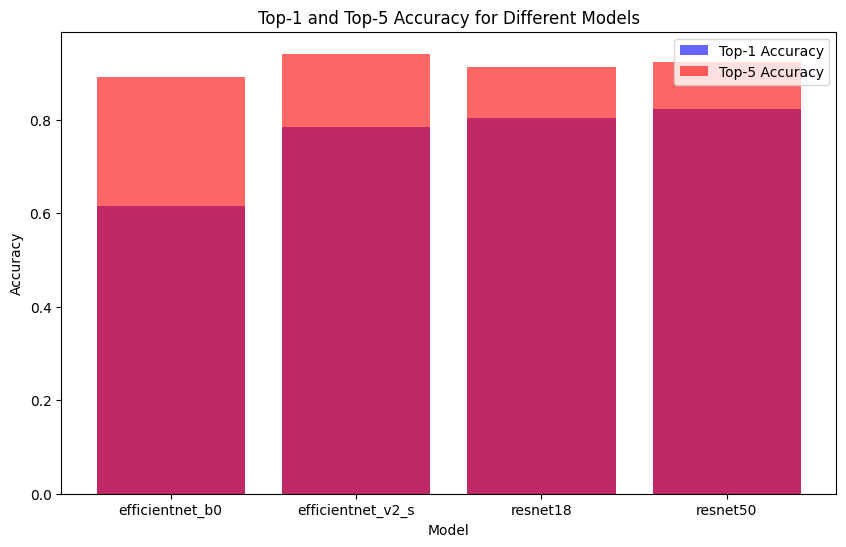

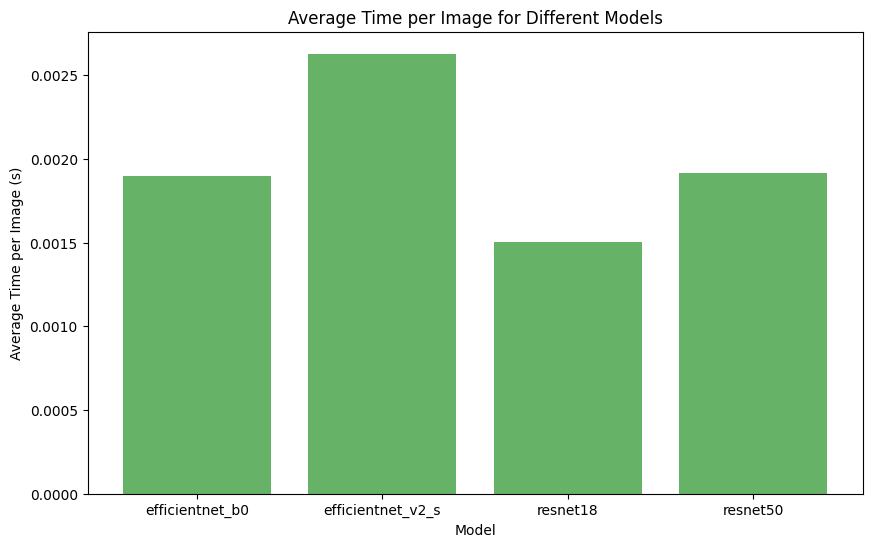

In [5]:
import os
import time
import random
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset, random_split
from PIL import Image
from torch.cuda.amp import GradScaler, autocast
import multiprocessing
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
import seaborn as sns
import psutil
from pynvml import nvmlInit, nvmlDeviceGetHandleByIndex, nvmlDeviceGetPowerUsage, nvmlShutdown

# Set a seed for reproducibility in initial data splitting
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed = 42
set_seed(seed)

# Get the number of available CPU cores
num_cores = multiprocessing.cpu_count()

# Set the device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations for the validation and test datasets without data augmentation
val_test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = Image.open(img_path).convert('RGB')
        label = int(self.annotations.iloc[index, 1])

        if self.transform:
            image = self.transform(image)

        return (image, label)

# Load the dataset
csv_file = '/kaggle/input/images256/files.csv'
root_dir = '/kaggle/input/images256/'
dataset = CustomDataset(csv_file=csv_file, root_dir=root_dir, transform=val_test_transform)

# Function to create models
def create_model(model_name, num_classes):
    if model_name == 'resnet50':
        model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif model_name == 'resnet18':
        model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif model_name == 'efficientnet_b0':
        model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    elif model_name == 'efficientnet_v2_s':
        model = models.efficientnet_v2_s(weights=models.EfficientNet_V2_S_Weights.IMAGENET1K_V1)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    else:
        raise ValueError("Invalid model name")
    return model

# Function to load the models
def load_model(model_path, model_name):
    model = create_model(model_name, num_classes=205)
    state_dict = torch.load(model_path, map_location=device)
    
    # Check if the model was saved with DataParallel
    if next(iter(state_dict)).startswith('module.'):
        # Remove the 'module.' prefix
        state_dict = {k[len('module.'):]: v for k, v in state_dict.items()}
    
    # Load the state dict
    model.load_state_dict(state_dict, strict=False)  # Use strict=False to ignore the fc layer mismatch
    
    model = model.to(device)
    
    # Wrap the model in DataParallel if multiple GPUs are available
    if torch.cuda.device_count() > 1:
        print(f"Using {torch.cuda.device_count()} GPUs!")
        model = nn.DataParallel(model)
    
    model.eval()
    return model

# Function to evaluate the model with additional metrics
def evaluate_model(model, test_loader):
    y_true = []
    y_pred = []
    y_probs = []
    start_time = time.time()
    cpu_power_usage = 0.0
    gpu_power_usage = 0.0
    nvmlInit()
    gpu_handles = [nvmlDeviceGetHandleByIndex(i) for i in range(torch.cuda.device_count())] if torch.cuda.is_available() else []
    
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            cpu_power_start = psutil.cpu_percent(interval=None)
            gpu_power_start = sum([nvmlDeviceGetPowerUsage(handle) for handle in gpu_handles]) if gpu_handles else 0
            
            outputs = model(inputs)
            probs = torch.nn.functional.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_probs.extend(probs.cpu().numpy())
            
            cpu_power_end = psutil.cpu_percent(interval=None)
            gpu_power_end = sum([nvmlDeviceGetPowerUsage(handle) for handle in gpu_handles]) if gpu_handles else 0
            
            cpu_power_usage += cpu_power_end - cpu_power_start
            gpu_power_usage += (gpu_power_end - gpu_power_start) / 1000  # Convert from mW to W
            
    total_time = time.time() - start_time
    n_images = len(y_true)
    
    top1_accuracy = accuracy_score(y_true, y_pred)
    
    # Calculate top-5 accuracy
    y_true_np = np.array(y_true)
    y_probs_np = np.array(y_probs)
    top5_preds = np.argsort(y_probs_np, axis=1)[:, -5:]
    top5_correct = np.any(top5_preds == y_true_np[:, None], axis=1)
    top5_accuracy = np.mean(top5_correct)

    # Calculate additional metrics
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_true, y_probs, multi_class='ovr')
    
    nvmlShutdown()

    return {
        'top1_accuracy': top1_accuracy,
        'top5_accuracy': top5_accuracy,
        'total_time': total_time,
        'n_images': n_images,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'cpu_power_usage': cpu_power_usage / len(test_loader),
        'gpu_power_usage': gpu_power_usage / len(test_loader)
    }

# Run multiple trials for each model
num_trials = 30
model_paths = [
    '/kaggle/input/resnet-model/efficientnet_v2_s_model_epoch_19.pth',
    '/kaggle/input/resnet-model/resnet50_model_epoch_19.pth',
    '/kaggle/input/resnet-model/resnet18_model_epoch_19.pth',
    '/kaggle/input/resnet-model/efficientnet_model_epoch_19.pth'
]
model_names = ['efficientnet_v2_s', 'resnet50', 'resnet18', 'efficientnet_b0']

trial_results = []

for model_path, model_name in zip(model_paths, model_names):
    efficiencies = []
    
    for trial in range(num_trials):
        # Set a different seed for each trial to vary the dataset splits
        set_seed(seed + trial)
        
        # Split the dataset into training, validation, and test sets for each trial
        train_size = int(0.7 * len(dataset))
        val_size = int(0.15 * len(dataset))
        test_size = len(dataset) - train_size - val_size
        train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
        val_dataset.dataset.transform = val_test_transform
        test_dataset.dataset.transform = val_test_transform
        test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=num_cores, pin_memory=True)
        
        model = load_model(model_path, model_name)
        metrics = evaluate_model(model, test_loader)
        top1_accuracy = metrics['top1_accuracy']
        top5_accuracy = metrics['top5_accuracy']
        total_time = metrics['total_time']
        n_images = metrics['n_images']
        trial_time = total_time / n_images
        
        trial_results.append({
            'Model': model_name,
            'Trial': trial + 1,
            'Top1_Accuracy': top1_accuracy,
            'Top5_Accuracy': top5_accuracy,
            'Time_Per_Image': trial_time,
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1': metrics['f1'],
            'ROC_AUC': metrics['roc_auc'],
            'CPU Power Usage (W)': metrics['cpu_power_usage'],
            'GPU Power Usage (W)': metrics['gpu_power_usage']
        })
        
        efficiencies.append(top1_accuracy / trial_time)  # Store efficiency for the model

# Convert trial results to DataFrame
trial_results_df = pd.DataFrame(trial_results)

# Calculate averages across all trials for each model
average_results = trial_results_df.groupby('Model').mean().reset_index()
average_results = average_results.drop(columns=['Trial'])

print(average_results)

# Save results to a CSV file
trial_results_df.to_csv('model_evaluation_results.csv', index=False)
average_results.to_csv('average_model_evaluation_results.csv', index=False)

# Calculate the ratio of top-1 accuracy to average time
average_results['Top1_Accuracy/AvgTime'] = average_results['Top1_Accuracy'] / average_results['Time_Per_Image']

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(average_results['Model'], average_results['Top1_Accuracy'], color='b', alpha=0.6, label='Top-1 Accuracy')
plt.bar(average_results['Model'], average_results['Top5_Accuracy'], color='r', alpha=0.6, label='Top-5 Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Top-1 and Top-5 Accuracy for Different Models')
plt.legend()
plt.savefig('model_accuracies.png')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(average_results['Model'], average_results['Time_Per_Image'], color='g', alpha=0.6)
plt.xlabel('Model')
plt.ylabel('Average Time per Image (s)')
plt.title('Average Time per Image for Different Models')
plt.savefig('model_times.png')
plt.show()



In [ ]:
# Save results to a CSV file
trial_results_df.to_csv('model_evaluation_results.csv', index=False)
average_results.to_csv('average_model_evaluation_results.csv', index=False)
